<a href="https://colab.research.google.com/github/yoonju977/CV_hufs_25-1/blob/main/CV_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


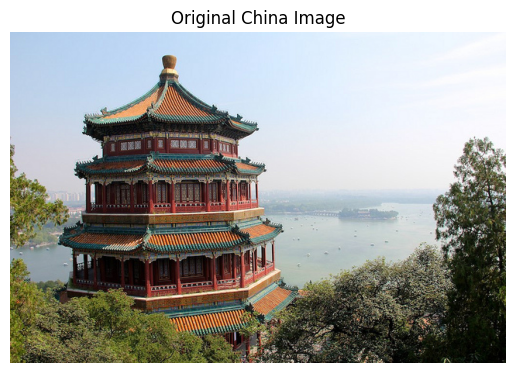

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#경로 지정
img_path = '/content/drive/MyDrive/HUFS/컴퓨터비전/china.jpg'

#이미지 읽기 (컬러)
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

#BGR → RGB 변환
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#이미지 출력
plt.imshow(img_rgb)
plt.axis('off')
plt.title('Original China Image')
plt.show()

In [10]:
#가로, 세로 해상도를 1/3로 줄이는 함수
def resize_image_by_third(img):
    height, width = img.shape[:2]
    new_width = width // 3
    new_height = height // 3

    resized_img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)
    return resized_img

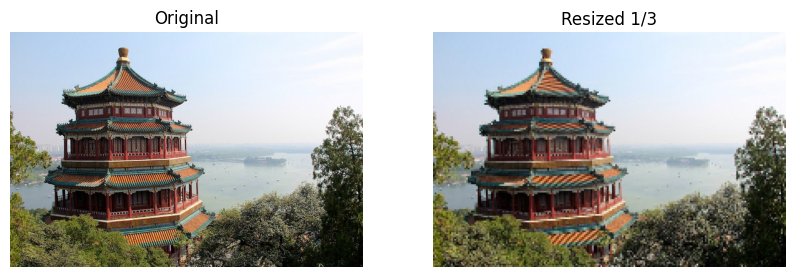

In [11]:
#해상도 줄이기
resized_img = resize_image_by_third(img_rgb)

#비교 출력
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img)
plt.title("Resized 1/3")
plt.axis('off')
plt.show()

In [12]:
#Bilinear interpolation으로 256x256 크기의 색상 이미지 생성
def create_color_rect():
    h, w = 256, 256
    img = np.zeros((h, w, 3), dtype=np.uint8)

    #꼭짓점 색상 지정(빨,파,초,노)
    top_left = np.array([255, 0, 0])
    top_right = np.array([0, 0, 255])
    bottom_left = np.array([0, 255, 0])
    bottom_right = np.array([255, 255, 0])

    for y in range(h):
        for x in range(w):

            tx = x / (w - 1)
            ty = y / (h - 1)

            # Bilinear Interpolation
            top = (1 - tx) * top_left + tx * top_right
            bottom = (1 - tx) * bottom_left + tx * bottom_right
            color = (1 - ty) * top + ty * bottom

            img[y, x] = color.astype(np.uint8)

    return img

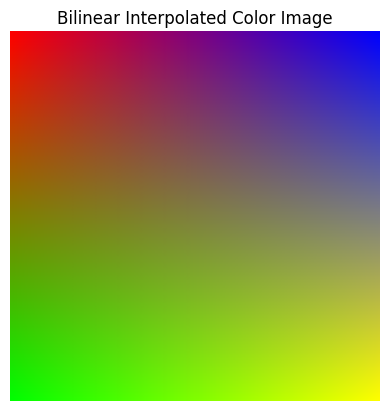

In [13]:
#이미지 생성
bilinear_img = create_color_rect()

#출력
plt.imshow(bilinear_img)
plt.axis('off')
plt.title('Bilinear Interpolated Color Image')
plt.show()